In [60]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay

In [61]:
svm = load_breast_cancer()
x = svm.data
y = svm.target

In [62]:
print(x.shape)

(569, 30)


In [63]:
print(y.shape)

(569,)


In [64]:
k_size = 0.25
r_seed = 100
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=k_size,random_state=r_seed)

In [65]:
print("Shape of X_train" ,X_train.shape)
print("Shape of y_train" ,y_train.shape)
print("Shape of X_train" ,X_test.shape)
print("Shape of y_train" ,y_test.shape)

Shape of X_train (426, 30)
Shape of y_train (426,)
Shape of X_train (143, 30)
Shape of y_train (143,)


# Decision Tree of Hold Out 

In [66]:
deci_tree =DecisionTreeClassifier(criterion ="entropy") # By default gini
deci_tree.fit(X_train,y_train)
prediction=deci_tree.predict(X_test)
accuracy_hold=accuracy_score(y_test,prediction)
a1= accuracy_hold*100
print( "Hold out ",a1)

Hold out  93.00699300699301


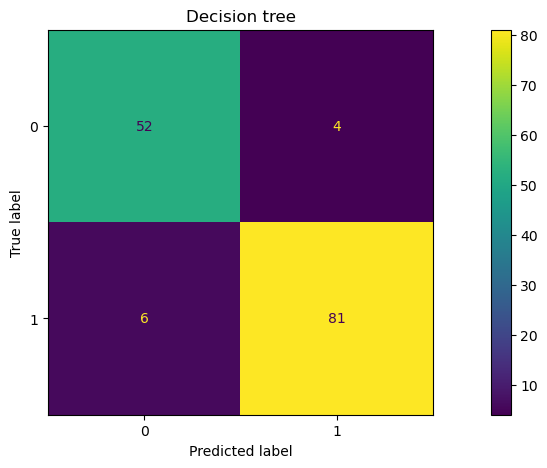

In [67]:
fig,(ax1)=plt.subplots()
fig.set_size_inches(15,5)
ax1.set_title("Decision tree")
ConfusionMatrixDisplay.from_estimator(deci_tree,X_test,y_test,ax=ax1)

# KNN

In [68]:
#KNN (Nearst Neighbour)
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("Accuracy ")
a2 = knn.score(X_test,y_test)*100
print(a2)

Accuracy 
95.8041958041958


C:\Users\CSLab\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Naive bayes

In [69]:
from sklearn.naive_bayes import GaussianNB
#fitting the model
nb=GaussianNB()
nb.fit(X_train,y_train)
prediction_nb =nb.predict(X_test)

print("Accuracy of Test Data")
nb_score=accuracy_score(y_test,prediction_nb)

a3 = nb_score*100
print("Naive Bayes Accuracy :",a3,"%")
print("Classification report on test data")
print(classification_report(y_test,prediction_nb))

Accuracy of Test Data
Naive Bayes Accuracy : 94.4055944055944 %
Classification report on test data
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        56
           1       0.94      0.97      0.95        87

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [70]:
import numpy as np
k=20
dta = []
for i in range(k):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
    deci_tree.fit(x_train, y_train)
    dta.append(deci_tree.score(x_test, y_test))
a4 = np.mean(dta)*100
print("Decision tree accuracy: " ,a4,"%")

Decision tree accuracy:  92.39766081871343 %


# Cross validation

In [71]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(deci_tree,svm.data,svm.target,cv=5)

In [72]:
mean_accuracy =scores.mean()
std_accuracy=scores.std()

In [73]:
a5 = mean_accuracy*100
print(a5)

93.85033379909953


In [77]:
print("Accurcay of Hold Out ",a1)
print("Accurcay of KNN ",a2)
print("Accurcay of Naive Bayes ",a3)
print("Accurcay of Cross Validation ",a4)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


Accurcay of Hold Out  93.00699300699301
Accurcay of KNN  95.8041958041958
Accurcay of Naive Bayes  94.4055944055944
Accurcay of Cross Validation  92.39766081871343
X_train shape: (18, 30)
y_train shape: (18,)


# Random Sub-Sampling

In [80]:
svm = load_breast_cancer()
x = svm.data
y = svm.target

subsample_size = 25  
test_size = 0.25  # 25% of the data will be used for testing
indices = np.random.choice(len(x), size=subsample_size, replace=True)

x_subsample = x[indices]
y_subsample = y[indices]

# Split the subsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_subsample, y_subsample, test_size=test_size, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Decision Tree Classifier on the scaled training data
deci_tree = DecisionTreeClassifier(criterion="entropy")
deci_tree.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = deci_tree.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(report)

Accuracy: 1.0


NameError: name 'iris' is not defined